In [1]:
from transformers import BartForConditionalGeneration, AutoTokenizer
from datasets import load_dataset
import torch
from rebel import from_text_to_kb
import networkx as nx

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# example using govreport
modelname = "abertsch/unlimiformer-bart-govreport-alternating"
dataset = load_dataset("urialon/gov_report_validation")

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained(modelname)

# example_input = dataset['validation'][0]['input']
example_input = open('harry_potter.txt','r').read()
print(example_input)


kb = from_text_to_kb(example_input, verbose=True)
print("________________________________________________")
kb.print()
relations = kb.get_relations()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (1894 > 1024). Running this sequence through the model will result in indexing errors


Harry Potter and the Sorcerer's Stone


CHAPTER ONE

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache. Mrs. Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere.

The Dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. They didn't
think they could bear it if anyone found out about the Potters. Mr

In [2]:
G = nx.DiGraph()

# Add nodes and edges to the graph
for pair in relations:
    head = pair['head']
    tail = pair['tail']
    relation = pair['type']
    metadata = pair['meta']
    
    # Add nodes
    if head not in G:
        G.add_node(head)
    if tail not in G:
        G.add_node(tail)
    
    # Add edge with metadata
    G.add_edge(head, tail, type=relation, meta=metadata)


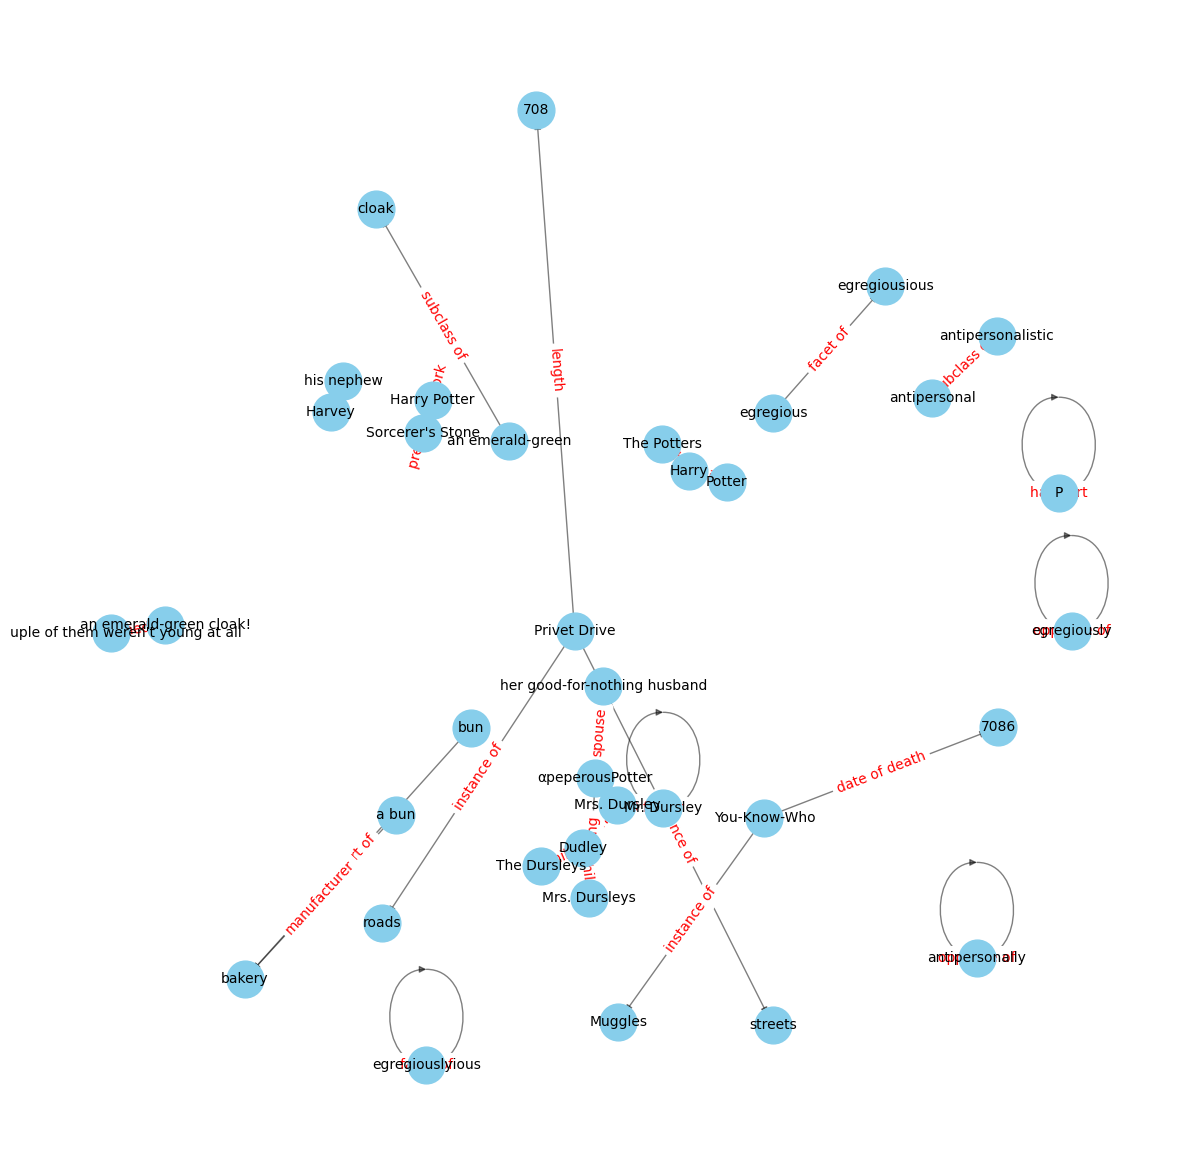

In [3]:
import matplotlib.pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(15, 15))

# Specify the layout for graph - for example, the spring layout
pos = nx.spring_layout(G, k=0.1, iterations=20)

# Draw the nodes 
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw the edges 
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)

# Draw node labels 
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw edge labels with a specific font size and color
edge_labels = nx.get_edge_attributes(G, 'type')  # Assuming 'type' is an attribute of edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.axis('off')

plt.show()